<a href="https://colab.research.google.com/github/neonicX-Tech/Recognet-Oranges-With-SVM/blob/main/svm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import classification_report

In [ ]:

Categories=['ripe oranges','unripe oranges']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/orange/oranges/train'
#path which contains all the categories of images
for i in Categories:

	print(f'loading... category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)



loading... category : ripe oranges
loaded category:ripe oranges successfully
loading... category : unripe oranges
loaded category:unripe oranges successfully


In [ ]:
# Creating a model using GridSearchCV with the parameters grid
import joblib
# model=GridSearchCV(svc,param_grid)
# Initialize GridSearchCV
custom_svm = GridSearchCV(svc, param_grid, scoring='accuracy', refit=True, cv=2, verbose=5)

# Fit the model for grid search
custom_svm.fit(x_train, y_train)

# Get the best parameters and best score
best_params = custom_svm.best_params_
best_score = custom_svm.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Testing the model using the testing data
y_pred = custom_svm.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")
print(classification_report(y_test, y_pred, target_names=['ripe oranges', 'unripe oranges']))

# Step 7: Save the best model for future use
joblib.dump(custom_svm.best_estimator_, 'best_svm_model.pkl')

# Load the best model
loaded_model = joblib.load('best_svm_model.pkl')

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.815 total time= 1.8min
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.842 total time= 1.8min
[CV 1/2] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.898 total time=  58.0s
[CV 2/2] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.882 total time=  58.0s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.771 total time= 2.9min
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.750 total time= 2.8min
[CV 1/2] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.900 total time=  44.1s
[CV 2/2] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.933 total time=  44.6s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.540 total time= 3.2min
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.540 total time= 3.5min
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.900 total time=  52.5s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly;

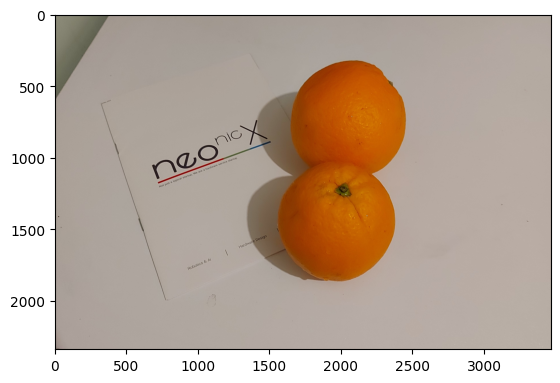

NameError: name 'model' is not defined

In [ ]:
import cv2
import joblib
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

# Load the best model
loaded_model = joblib.load('best_svm_model.pkl')

# Define the categories
Categories = ["ripe", "unripe"]

# Load and preprocess the image
path = '/content/20240407_211600.jpg'
img = imread(path)
plt.imshow(img)
plt.show()
img_resize = resize(img, (150, 150, 3))
img_flatten = img_resize.flatten()
img_input = np.array([img_flatten])

# Predict probabilities
probability = loaded_model.predict_proba(img_input)

# Print probabilities for each category
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')

# Predict the class label
predicted_class_index = loaded_model.predict(img_input)[0]
predicted_class_name = Categories[predicted_class_index]
print("The predicted image is:", predicted_class_name)

# Display the predicted class on the image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, f'Class: {predicted_class_name}', (20, 350), font, 5, (255, 50, 0), 12)
cv2.imwrite('/content/Untitled Folder/1.jpg', img)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git@github.com:neonicX-Tech/Recognet-Oranges-With-SVM.git

/bin/bash: line 1: git@github.com:neonicX-Tech/Recognet-Oranges-With-SVM.git: No such file or directory
